In [1]:
#Libraries
from functools import reduce
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import random
from random import choice
#import requests
#from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
#import wget
import gzip
import os
import locale
#Libraries
from bs4 import BeautifulSoup
from datetime import datetime
from dateutil.parser import parse
from functools import reduce
from random import choice
from requests import get
from scipy.stats import iqr
from sklearn import preprocessing
from sqlalchemy import create_engine
from zipfile import ZipFile
import gzip
import itertools
import locale
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import re
import requests
import seaborn as sns
#import wget
sns.set()

import sys
sys.executable


# Connection Data
driver = 'mysql+pymysql'
ip = '34.65.10.136'
username = 'data-students'
password = 'iR0nH@cK-D4T4B4S3'
db = 'fitbit'
connection_string  = f'{driver}://{username}:{password}@{ip}/{db}'
# Engine & Query
engine = create_engine(connection_string)
query = 'SELECT * FROM fitbit2'
# Database Request
authors = pd.read_sql(query,engine)

In [2]:
df = pd.read_csv('iris-data.csv')

In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
df.describe()
#vesicolour - The unwinged, erect stems generally have basal leaves that are more than 1 cm (1⁄2 in) wide


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum(axis = 0 )

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [7]:
from sklearn.datasets import load_iris
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

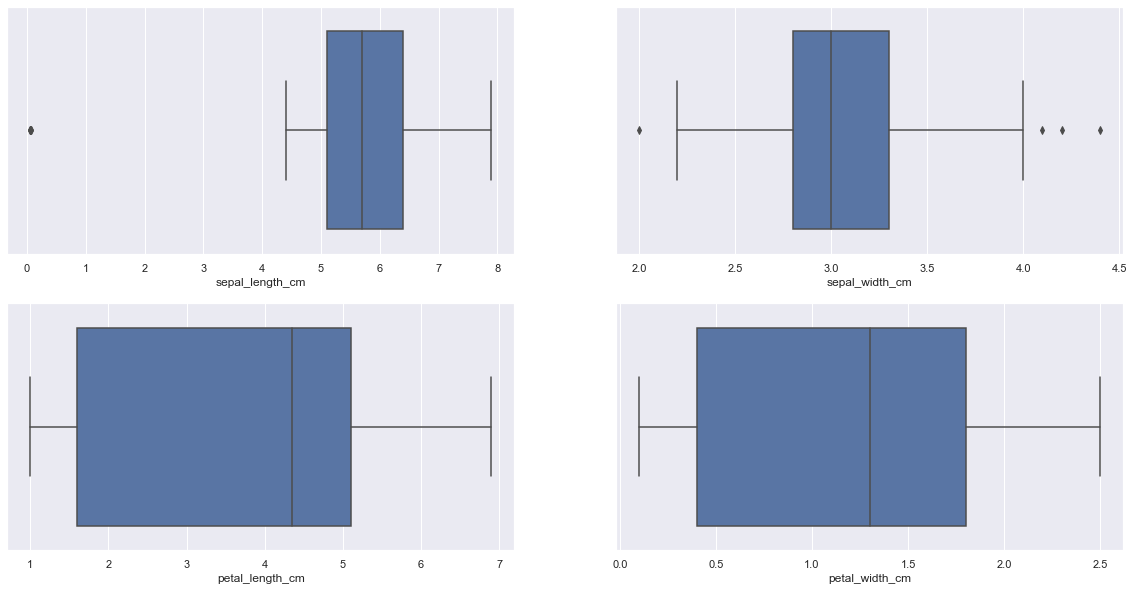

In [8]:
fig, ax = plt.subplots(2,2, figsize = (20, 10)) #columns and rows, number of axes, figure size 
ax[0]
sns.boxplot(data=df, x = 'sepal_length_cm', ax = ax[0,0]) #selecting y and axes where to draw
sns.boxplot(data=df, x = 'sepal_width_cm', ax = ax[0,1])
sns.boxplot(data=df, x = 'petal_length_cm', ax = ax[1,0])
sns.boxplot(data=df, x = 'petal_width_cm', ax = ax[1,1])

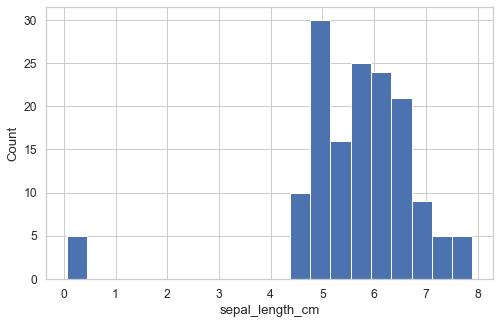

In [9]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['sepal_length_cm'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='sepal_length_cm', ylabel='Count');

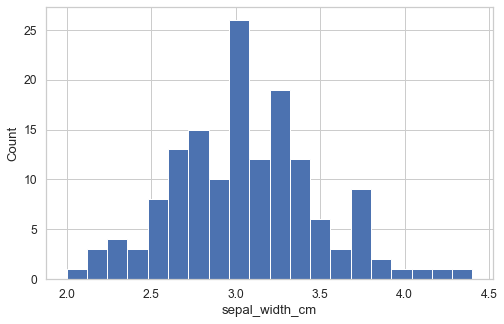

In [10]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['sepal_width_cm'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='sepal_width_cm', ylabel='Count');

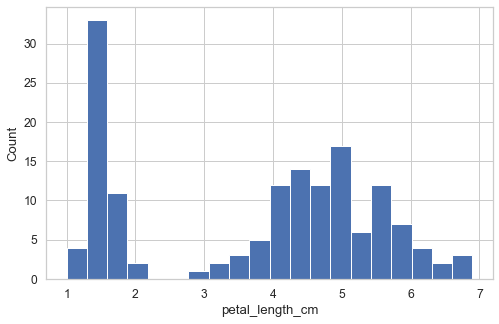

In [11]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['petal_length_cm'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='petal_length_cm', ylabel='Count');

C:\Users\ellio\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ellio\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


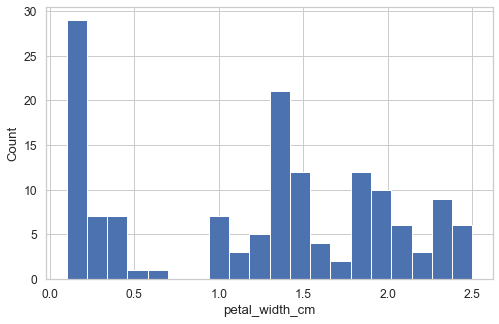

In [12]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['petal_width_cm'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='petal_width_cm', ylabel='Count');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000142C0E98BE0>]],
      dtype=object)

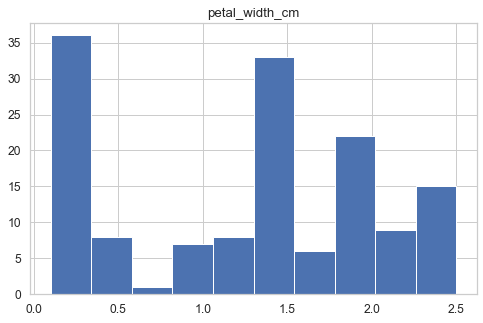

In [13]:
df.hist('petal_width_cm')

In [14]:
df.petal_width_cm.describe()

count    145.000000
mean       1.236552
std        0.755058
min        0.100000
25%        0.400000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width_cm, dtype: float64

In [15]:
df['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [16]:
df['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [17]:
df[~df.petal_width_cm.notnull()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [18]:
#vesicolour - The unwinged, erect stems generally have basal leaves that are more than 1 cm (1⁄2 in) wide

In [78]:
df['class'].replace({'versicolor': 'Iris-versicolor', 'Iris-setossa': 'Iris-setosa'}, inplace=True)

In [80]:
df['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

In [81]:
dfnan = df[~df.petal_width_cm.notnull()]
df_fixed = df

In [82]:
df_fixed.interpolate(method ='linear', inplace=True)

In [83]:
df_fixed[~df_fixed.petal_width_cm.notnull()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [84]:
dfnan

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [85]:
df_fixed.iloc[7]

sepal_length_cm              5
sepal_width_cm             3.4
petal_length_cm            1.5
petal_width_cm        0.266667
class              Iris-setosa
Name: 7, dtype: object

In [86]:
df_fixed[df_fixed['class']=='Iris-setosa']

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.200000,Iris-setosa
1,4.9,3.0,1.4,0.200000,Iris-setosa
2,4.7,3.2,1.3,0.200000,Iris-setosa
3,4.6,3.1,1.5,0.200000,Iris-setosa
4,5.0,3.6,1.4,0.200000,Iris-setosa
5,5.4,3.9,1.7,0.400000,Iris-setosa
6,4.6,3.4,1.4,0.300000,Iris-setosa
7,5.0,3.4,1.5,0.266667,Iris-setosa
8,4.4,2.9,1.4,0.233333,Iris-setosa
9,4.9,3.1,1.5,0.200000,Iris-setosa


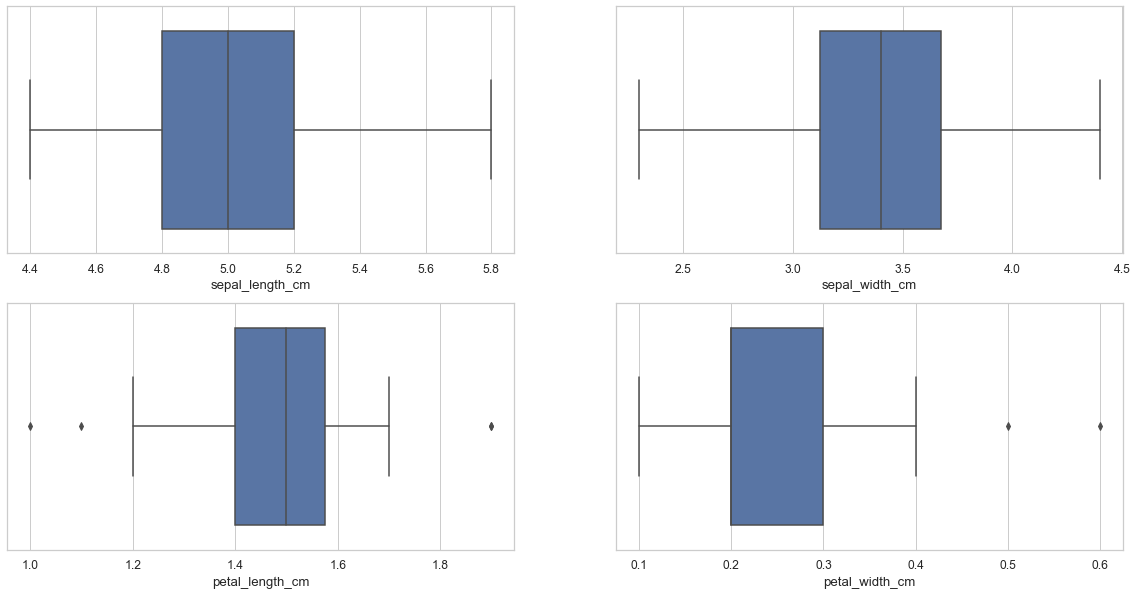

In [87]:
fig, ax = plt.subplots(2,2, figsize = (20, 10)) #columns and rows, number of axes, figure size 
ax[0]
sns.boxplot(data=df_fixed[df_fixed['class']=='Iris-setosa'], x = 'sepal_length_cm', ax = ax[0,0]) #selecting y and axes where to draw
sns.boxplot(data=df_fixed[df_fixed['class']=='Iris-setosa'], x = 'sepal_width_cm', ax = ax[0,1])
sns.boxplot(data=df_fixed[df_fixed['class']=='Iris-setosa'], x = 'petal_length_cm', ax = ax[1,0])
sns.boxplot(data=df_fixed[df_fixed['class']=='Iris-setosa'], x = 'petal_width_cm', ax = ax[1,1])


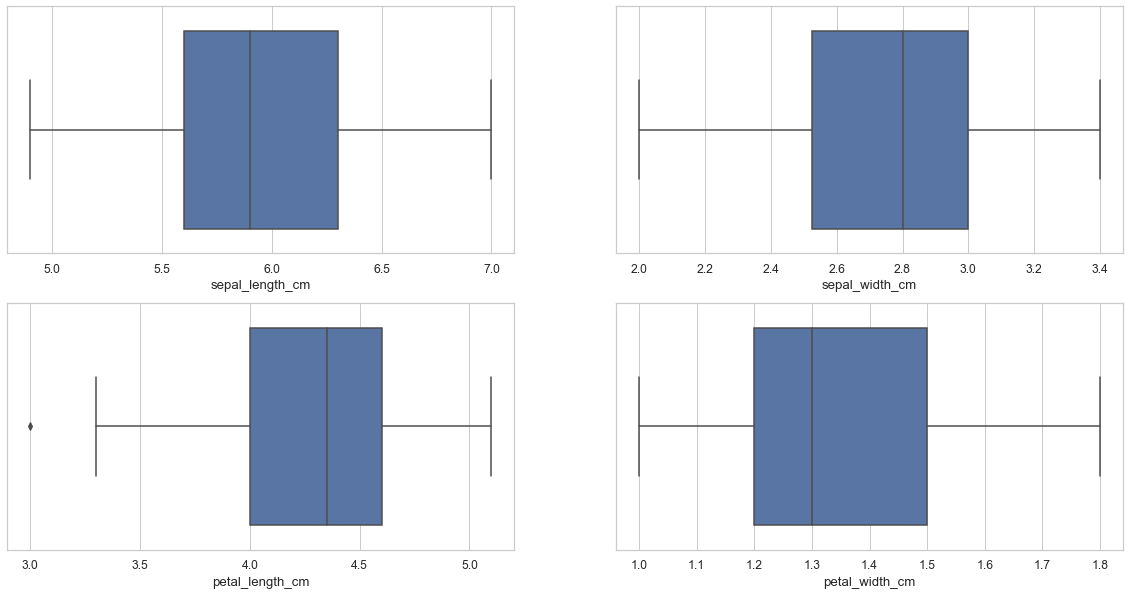

In [88]:
fig, ax = plt.subplots(2,2, figsize = (20, 10)) #columns and rows, number of axes, figure size 
ax[0]
sns.boxplot(data=df_fixed[df_fixed['class']=='Iris-versicolor'], x = 'sepal_length_cm', ax = ax[0,0]) #selecting y and axes where to draw
sns.boxplot(data=df_fixed[df_fixed['class']=='Iris-versicolor'], x = 'sepal_width_cm', ax = ax[0,1])
sns.boxplot(data=df_fixed[df_fixed['class']=='Iris-versicolor'], x = 'petal_length_cm', ax = ax[1,0])
sns.boxplot(data=df_fixed[df_fixed['class']=='Iris-versicolor'], x = 'petal_width_cm', ax = ax[1,1])

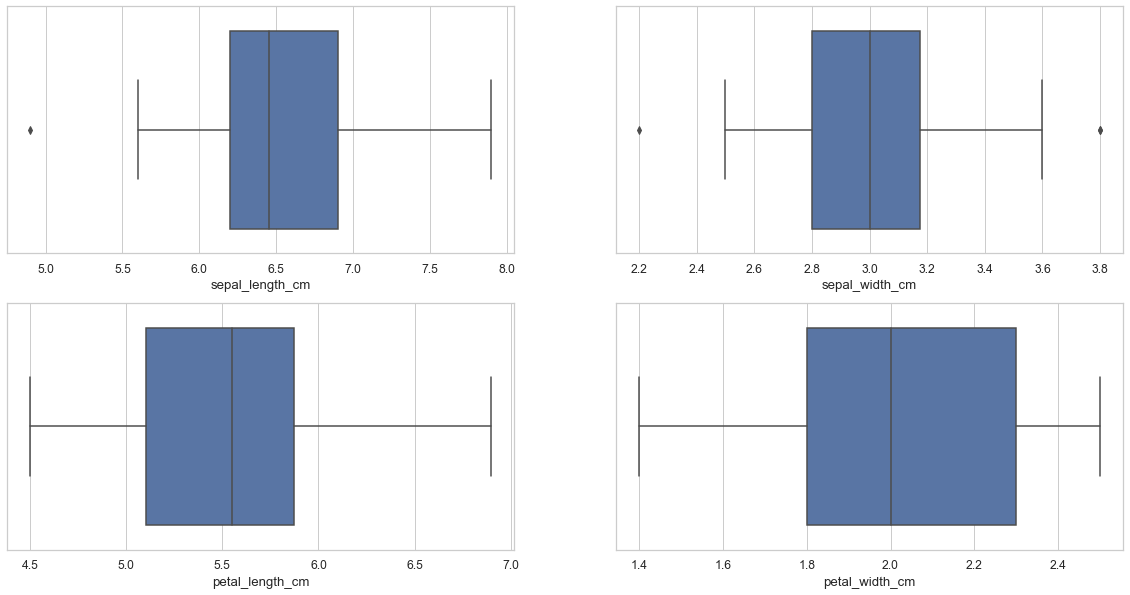

In [89]:
fig, ax = plt.subplots(2,2, figsize = (20, 10)) #columns and rows, number of axes, figure size 
ax[0]
sns.boxplot(data=df_fixed[df_fixed['class']=='Iris-virginica'], x = 'sepal_length_cm', ax = ax[0,0]) #selecting y and axes where to draw
sns.boxplot(data=df_fixed[df_fixed['class']=='Iris-virginica'], x = 'sepal_width_cm', ax = ax[0,1])
sns.boxplot(data=df_fixed[df_fixed['class']=='Iris-virginica'], x = 'petal_length_cm', ax = ax[1,0])
sns.boxplot(data=df_fixed[df_fixed['class']=='Iris-virginica'], x = 'petal_width_cm', ax = ax[1,1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000142C3EBC0F0>,
      dtype=object)

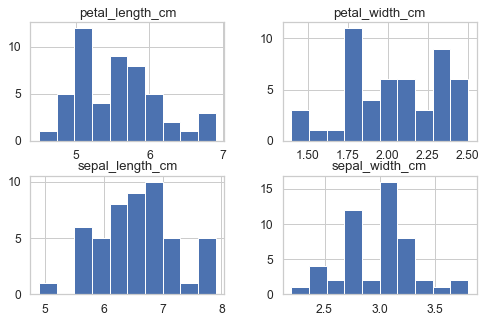

In [90]:
df_fixed[df_fixed['class']=='Iris-virginica'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000142C432F400>,
      dtype=object)

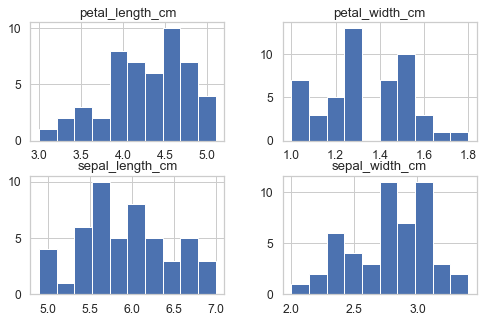

In [91]:
df_fixed[df_fixed['class']=='Iris-versicolor'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000142C448D908>,
      dtype=object)

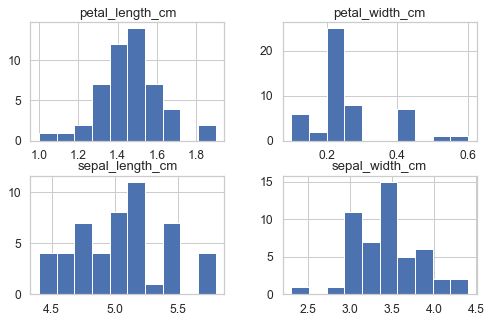

In [92]:
df_fixed[df_fixed['class']=='Iris-setosa'].hist()

In [93]:
#sepcal_length_cm
#df_fixed[df_fixed['class']=='Iris-versicolor' & df_fixed['sepal_length_cm'] < 2]

df_fixed.loc[(df_fixed['class']=='Iris-versicolor') & ( df_fixed['sepal_length_cm'] < 2)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [94]:
df_fixed.loc[(df_fixed['class']=='Iris-versicolor') & ( df_fixed['sepal_length_cm'] >2)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor


In [95]:
def multbyten(X):
    if X < 2:
        return 10 * X
    else:
        return X
    
df_fixed['sepal_length_cm'] = df_fixed['sepal_length_cm'].apply(multbyten)

In [96]:
#q1 = np.percentile(census.FamilyWork, 25)
#q3 = np.percentile(census.FamilyWork, 75)
#iqr = q3 - q1
#upper_fence = q3 + 3 * iqr
#lower_fence = q1 - 3 * iqr
#census_without_outliers = census[census.FamilyWork < upper_fence]
#census_without_outliers = census_without_outliers[census_without_outliers.FamilyWork > lower_fence]

#census_without_outliers

NameError: name 'census' is not defined

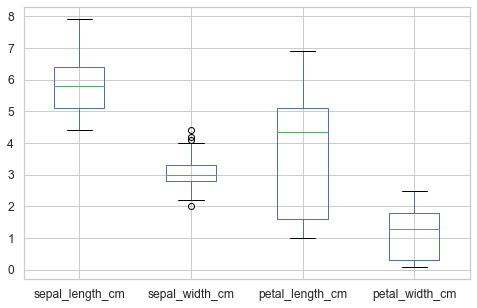

In [97]:
df_fixed.boxplot()

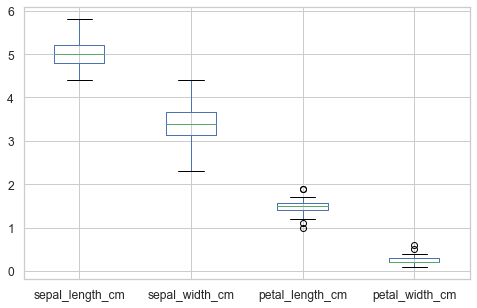

In [98]:
df_fixed[df_fixed['class']=='Iris-setosa'].boxplot()

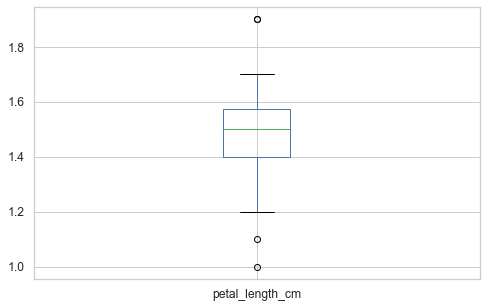

In [99]:
df_fixed[df_fixed['class']=='Iris-setosa'].boxplot('petal_length_cm')

In [100]:
df_fixed[df_fixed['class']=='Iris-setosa'].describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.000000,50.000000,50.000000,50.000000
mean,5.034000,3.418000,1.464000,0.246000
std,0.350865,0.381024,0.173511,0.106456
min,4.400000,2.300000,1.000000,0.100000
25%,4.800000,3.125000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.200000,3.675000,1.575000,0.300000
max,5.800000,4.400000,1.900000,0.600000


In [101]:
df_fixed.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

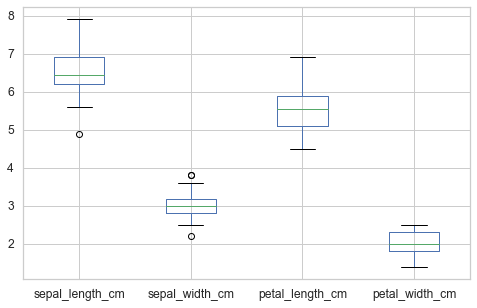

In [102]:
df_fixed[df_fixed['class']=='Iris-virginica'].boxplot()

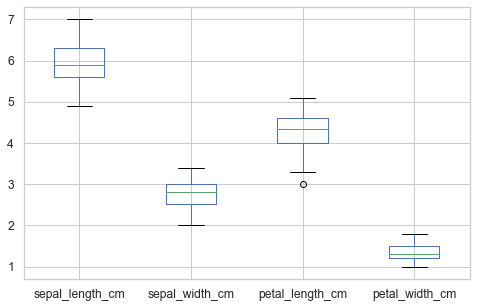

In [103]:
df_fixed[df_fixed['class']=='Iris-versicolor'].boxplot()

In [104]:
df_fixed.to_csv('df_fixed.csv')